# Day 01: Points

For this category, I am interested in creating a simple visualization of past earthquakes near a country of interest. This type of visualization would be useful for my everyday work, and offers an opportunity to set up a basic infrastructure to easily produce maps for both this challenge and any future mapping exercises.

There are a variety of data sources I will use throughout these exercises, including:
* [Explorer Basemap](https://visibleearth.nasa.gov/images/147190/explorer-base-map): Joshua Stevens, NASA Earth Observatory
* [Comprehensive Global Administrative Zones (CGAZ)](https://www.geoboundaries.org/): geoBoundaries 4.0, William & Mary geoLab
* [Marine polys and lakes](https://www.naturalearthdata.com/): Natural Earth
* [World Cities](https://simplemaps.com/data/world-cities): Simple Maps

Data sources specific to a single day will be linked in the notebook where they appear.

## Configuration
Dependency imports and utility functions are in a separate `plotter.py` file in order to keep these notebooks clean.

In [1]:
from plotter import *
from pylab import cm
import matplotlib.colors as mcol
import matplotlib.lines as mlines
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Earthquake data
Data regarding the location and magnitude of past earthquake events comes from the [ISC-GEM Global Instrumental Earthquake Catalogue (1904-2017)](http://www.isc.ac.uk/iscgem/), Version 7.0, dated 9th April 2020 .

Citations:

* Storchak, D.A., D. Di Giacomo, I. Bondár, E.R. Engdahl, J. Harris, W.H.K. Lee, A. Villaseñor and P. Bormann (2013). Public Release of the ISC-GEM Global Instrumental Earthquake Catalogue (1900-2009). Seism. Res. Lett., 84, 5, 810-815, doi: 10.1785/0220130034.

* Storchak, D.A., D. Di Giacomo, E.R. Engdahl, J. Harris, I. Bondár, W.H.K. Lee, P. Bormann and A. Villaseñor (2015). The ISC-GEM Global Instrumental Earthquake Catalogue (1900-2009): Introduction, Phys. Earth Planet. Int., 239, 48-63, doi: 10.1016/j.pepi.2014.06.009.

* Di Giacomo, D., E.R. Engdahl and D.A. Storchak (2018). The ISC-GEM Earthquake Catalogue (1904–2014): status after the Extension Project, Earth Syst. Sci. Data, 10, 1877-1899, doi: 10.5194/essd-10-1877-2018.

In [2]:
# Map to path
data_folder = os.path.join("..", "data", "etc")
point_folder = os.path.join(data_folder, "isc-gem")
point_file = "isc-gem-cat.csv"
point_path = os.path.join(point_folder, point_file)

# Number of header lines to skip
n_skip = 92

# Read data
points_df = pd.read_csv(point_path, skiprows=n_skip)

# Regularize column names
points_df.columns = [col.strip() for col in points_df.columns]
points_df = points_df.rename(columns={'#         date': 'date'})

# Convert from dataframe to geodataframe
points = gpd.GeoDataFrame(points_df, geometry=gpd.points_from_xy(x=points_df.lon, y=points_df.lat), crs=WGS84)

# Preview
print(points.columns)
points.head(5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['date', 'lat', 'lon', 'smajax', 'sminax', 'strike', 'q', 'depth', 'unc',
       'q .1', 'mw', 'unc', 'q .2', 's', 'mo', 'fac', 'mo_auth', 'mpp', 'mpr',
       'mrr', 'mrt', 'mtp', 'mtt', 'str1', 'dip1', 'rake1', 'str2', 'dip2',
       'rake2', 'type', 'eventid', 'geometry'],
      dtype='object')


,date,lat,lon,smajax,sminax,strike,q,depth,unc,q .1,...,mtt,str1,dip1,rake1,str2,dip2,rake2,type,eventid,geometry
0,1904-04-04 10:02:34.56,41.802,23.108,8.6,6.6,164.2,B,15.0,4.8,C,...,,,,,,,,,610326271,POINT (23.10800 41.80200)
1,1904-04-04 10:26:00.88,41.758,23.249,8.3,6.9,15.2,B,15.0,4.8,C,...,,,,,,,,,16957813,POINT (23.24900 41.75800)
2,1904-06-25 14:45:39.14,51.424,161.638,33.6,18.7,116.2,C,15.0,25.0,C,...,,,,,,,,,16957820,POINT (161.63800 51.42400)
3,1904-06-25 21:00:38.72,52.763,160.277,28.6,14.6,43.1,C,30.0,10.3,C,...,,,,,,,,,16957819,POINT (160.27700 52.76300)
4,1904-12-20 05:44:20.44,8.962,-84.042,26.3,13.2,74.1,C,10.0,14.0,C,...,,,,,,,,,16957832,POINT (-84.04200 8.96200)


## Construct map

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


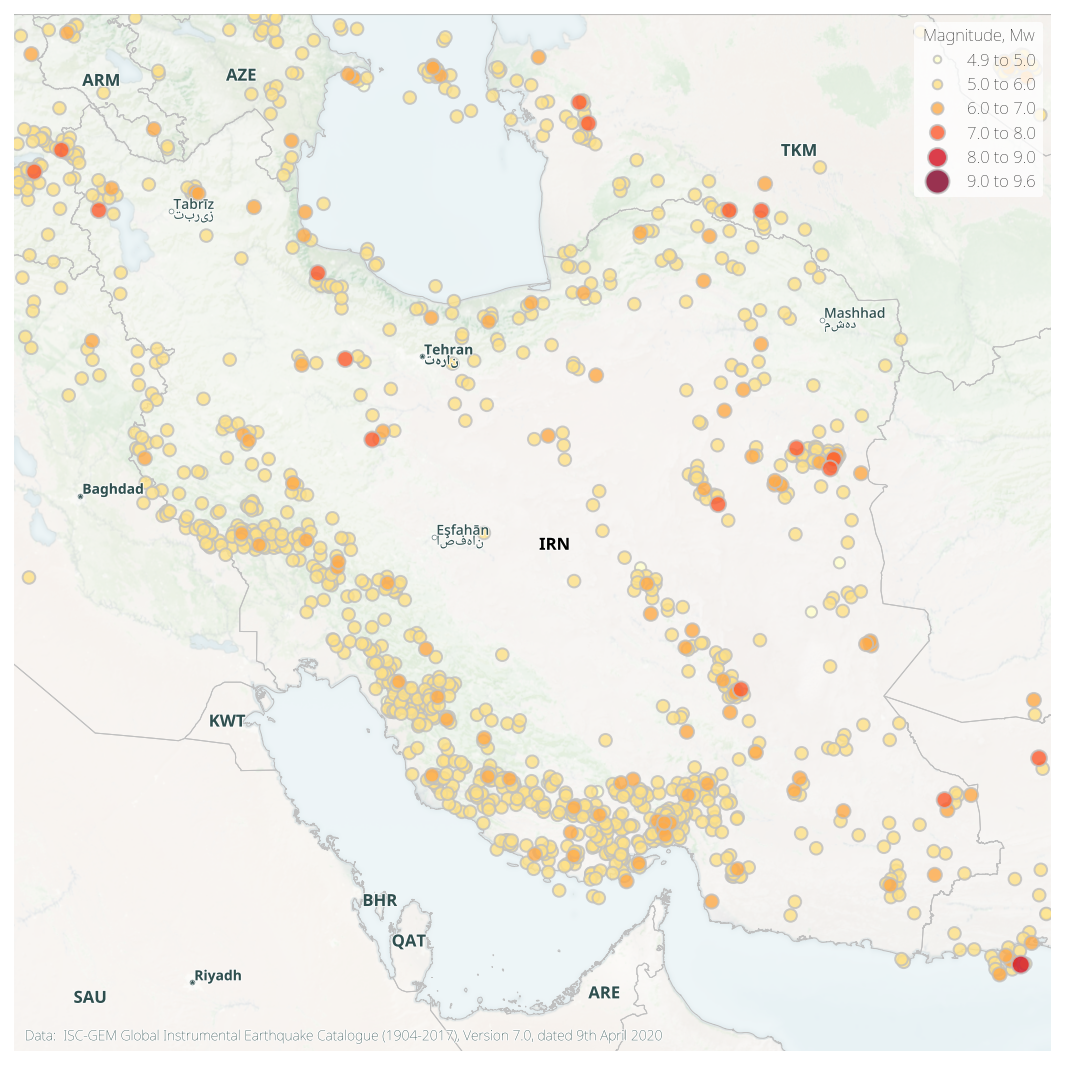

In [6]:
# Choose country of interest by ISO 3166-1 alpha-3
iso = "IRN"
# Choose output dpi
FIG_DPI = 300

# Read in desired country settings
settings = read_settings(iso)

# Construct plot
fig, ax = plt.subplots(figsize=(8,8))

# Read local geospatial data
world_admin, world_points = read_world_admin(settings)
capital_cities, populated_places = read_populated_places(iso, settings)
lakes, lakes_points = read_lakes(settings)
if bool(settings["PLOT_MARINE"]):
    marine, marine_points = read_marine(settings)
    
# Extract relevant country
country_admin = world_admin[world_admin.ISO_CODE == iso].copy()

# Get desired boundaries
# Check settings for specified bounds
bbox = settings[["BBOX_LEFT", "BBOX_BOTTOM", "BBOX_RIGHT", "BBOX_TOP"]]
if bbox.sum() != 0: # TODO: Fix this logic to handle case where one edge is provided
    bbox = bbox.tolist()
else:
    bbox = country_admin.total_bounds

# Check for specified buffer
buffer = 0.1
if pd.notna(settings["BBOX_BUFFER"]):
    buffer = settings["BBOX_BUFFER"]

# Set axis limits
left, right, top, bottom = get_buffered_bounds(bbox, buffer=buffer)
ax.set_xlim(left, right)
ax.set_ylim(bottom, top)

# Check for specified legend location
loc = "best"
if pd.notna(settings["LEGEND_LOC"]):
    loc = str(settings["LEGEND_LOC"])
    
# Project data layer
points = points.to_crs(settings['WEBMERC'])

# Create discrete bins for data layer
points.markersize = float('nan')
points.color = ""
bins = [points.mw.min(), 5, 6, 7, 8, 9, points.mw.max()]
n_bins = len(bins) - 1
sizes = np.logspace(1.5, 2., n_bins)
cmap = cm.get_cmap("YlOrRd",n_bins)
norm = mcol.BoundaryNorm(bins,cmap.N)
for i in range(n_bins):
    idx = (points['mw'] >= bins[i]) & (points['mw'] < bins[i+1])
    points.loc[idx, 'markersize'] = sizes[i]
    
# Add data layer
points_clip = points.cx[left:right, bottom:top].sort_values('mw', ascending=True).copy()
points_clip.plot(
    ax=ax,
    column='mw',
    cmap=cmap,
    norm=norm,
    markersize=points_clip['markersize'],
    alpha=ALPH,
    edgecolor=BORDER_COLOR,
    zorder=Z_DATA,
)

# Create custom legend for data layer
legend_list = [f"{bins[i]:.1f} to {bins[i+1]:.1f}" for i in range(n_bins)]
cmap=cm.get_cmap("YlOrRd")
listed_colors = cmap(np.linspace(0,1,n_bins))
markers = [mlines.Line2D([], [], color=listed_colors[i], marker='.', alpha=ALPH, markeredgecolor=BORDER_COLOR,
            linestyle='None', markersize=sizes[i], label=legend_list[i]) for i in range(n_bins)]
ax.legend(handles=markers, markerscale=72./FIG_DPI, fontsize="small", title_fontsize="small",
          title="Magnitude, Mw", loc=loc).set_zorder(Z_LABEL)

# Add annotation to attribute data source
ax.annotate("Data:  ISC-GEM Global Instrumental Earthquake Catalogue (1904-2017), Version 7.0, dated 9th April 2020",
               xy=(0.01,0.01), xycoords='axes fraction', fontsize="x-small", color=DEFAULT_COLOR, path_effects=[
                                    PathEffects.withStroke(
                                        linewidth=1,
                                        foreground="w",
                                        alpha=ALPH)
                                    ], zorder=Z_LABEL)

# Get custom bondaries for annotations
buffer = 0.05
if pd.notna(settings["ANNO_BUFFER"]):
    buffer = settings["ANNO_BUFFER"]
left, right, top, bottom = get_buffered_bounds(bbox, buffer=buffer)

# Set layout
set_layout(ax)

# Add basemap
set_basemap(settings, ax)

# Add world boundaries and labels
add_world_boundaries(world_admin, iso, ax)
add_world_labels(world_points.cx[left:right, bottom:top], iso, ax)

# Add populated places
add_populated_places(populated_places.cx[left:right, bottom:top], ax)

# Add capital_cities
add_capital_cities(capital_cities.cx[left:right, bottom:top], ax)

# Save map
out_file = f"01_{iso}.png"
out_path = os.path.join(OUT_PATH, out_file)
plt.savefig(out_path, dpi=FIG_DPI, facecolor="w", bbox_inches='tight')

# Show figure
plt.show()